 ## Proyecto de presentacion de Inteligencia Artificial

<u>Nombre del Estudiante </u> :  José Araya Prohens     


## Recomendaciones de animes de la plataforma de streaming crunchyroll

<u>**Mi csv**</u>:      
 Es un dataset de los shows disponibles en la plataforma de streaming de pago llamado crunchyroll , este dataset posee más de 1000 filas de datos , estos datos fueron adqueridos del servicio en mayo 2022 de Estados Unidos       [enlace de Kaggle](https://www.kaggle.com/datasets/victorsoeiro/crunchyroll-animes-and-movies?select=titles.csv)     

<u>**Mi propuesta**</u>:    
Analizar los datos de manera que puedas predecir un tiulo recomendado a partir de un genero que te gusta o un titulo que ya viste.  

<u>**Modelo que se piensa implementar**</u>     
 Arboles de Decision   
    
<u>**Objetivo** </u> :   
Predecir y Recomendar al usuario titulos candidatos del gusto del usuario segun titulos que ya se ha visto.



<u>**Referencias Bibliograficas** </u> :        
Sistema de recomendaciones en base de arbol de decision [enlace](https://cs.emis.de/LNI/Proceedings/Proceedings165/170.pdf)
https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4 (usado)

### Instrucciones del profesor
Estimado alumnos:

Este es un recordatorio para el trabajo de presentacion.

CONDICIONES:
Basado en la busqueda personal anunciada en clases de un dataset a su interes. Debe generar un estudio sobre dicho
dataset. El estudio es de caracter indagatorio, en el cual se evaluaran las siguientes cosas:

1. Uso y manejo de las herramientas de manipulacion de datos (DataFrame) (10%)
2. Propuesta y desarrollo de indicadores estadisticos con algun fin que estime pertinente (20%)
3. Muestra de graficos (con matplotlib BIEN HECHOS) , con el fin de plantear alguna problematica/propuesta u otro, el cual le parece adecuado mostrar. (30%)
4. Uso de algun modelo predictivo aprendido durante el curos, sea, KMeans, algun regresor linea o arboles (otros modelos que usted estudie, son permitidos)(30%)
5. Muestra de resultados, y analisis del modelo encontrando, con foco en su precision predictiva y overfit (si applica) (10%)
NOTA:
Recuerde que puede usar cualquer recurso mostrado en el curso, si usa otro modelo, debe explicar el nuevo modelo. Si
considera necesario usar PCA, HAGALO!

El Profe!

### Imports

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rich import print
from rich import pretty
%load_ext rich

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


### Cargando el dataset de Crunchyroll

In [89]:
titulos = pd.read_csv("csv/titles.csv")
creditos = pd.read_csv("csv/credits.csv")



primero vamos a definir que variables importan para este trabajo

In [90]:
titulos = titulos[['title','type','description','release_year','age_certification','runtime','genres','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']]
titulos['genres'] = titulos['genres'].str.replace('[','',regex=True).replace(']','',regex=True).replace("'",'',regex=True)
titulos['title'] = titulos['title'].str.capitalize()
titulos.head()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,7.9,2281.0,41.250,8.1
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,7.8,459.0,5.064,8.3
3,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"scifi, animation, action, comedy, crime, fantasy",4.0,8.0,1738.0,0.600,NaN
4,Chōdenji machine voltes v,SHOW,Chōdenji Machine Voltes V is a Japanese anime ...,1977,TV-PG,24,"drama, action, scifi, animation",1.0,8.1,207.0,12.625,7.3


### Descripcion  e informacion del dataset

In [91]:
titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1081 non-null   object 
 1   type               1081 non-null   object 
 2   description        1050 non-null   object 
 3   release_year       1081 non-null   int64  
 4   age_certification  750 non-null    object 
 5   runtime            1081 non-null   int64  
 6   genres             1081 non-null   object 
 7   seasons            1080 non-null   float64
 8   imdb_score         907 non-null    float64
 9   imdb_votes         907 non-null    float64
 10  tmdb_popularity    1068 non-null   float64
 11  tmdb_score         1006 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 101.5+ KB


tenemos 1081 filas de datos 

In [92]:
titulos.shape

(1081, 12)

In [93]:
titulos.size

12972

### Cantidad de Animes por genero en la plataforma de Crunchyroll

In [94]:
unique_genres = [val.strip() for sublist in titulos.genres.dropna().str.split(",").tolist() for val in sublist]

In [95]:
genres_summary = pd.DataFrame(unique_genres,columns=['genres']).value_counts().reset_index().rename(columns={0:'count'})
#Eliminamos la categoria animacion y la categoria vacia ya que estas no son importantes a la hora de graficarlo
genres_summary = genres_summary.drop(0) 
genres_summary = genres_summary.drop(15) 

Cantidad de animes por genero

In [96]:
genres_summary

,genres,count
1,comedy,567
2,scifi,472
3,action,463
4,drama,395
5,fantasy,353
6,romance,253
7,thriller,90
8,sport,55
9,horror,49
10,family,35


grafica de la cantidad de animes que tiene cada genero en la plataforma de crunchyroll

<AxesSubplot:xlabel='count', ylabel='genres'>

<Figure size 432x288 with 1 Axes>

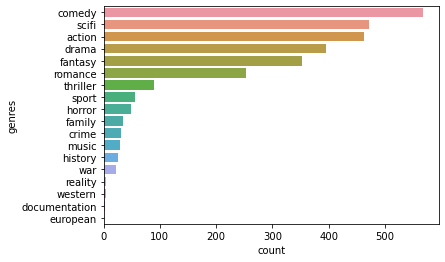

In [97]:
ax = sns.barplot(x="count", y="genres", data=genres_summary)
ax


Se puede concluir que el genero con mas titulos es la Comedia ,seguido del Scifi y despues la Accion.

### Cantidad de animes por año de estreno


In [98]:
releaseYearSum = pd.DataFrame(titulos,columns=['release_year']).value_counts().reset_index().rename(columns={0:'count'} )
releaseYearSum  = releaseYearSum.sort_values(by = 'release_year' , ascending=False).reset_index()
releaseYearSum = releaseYearSum.drop(columns=['index'])


In [182]:
releaseYearSum.nlargest(n=3,columns='count')

,release_year,count
4,2018,117
6,2016,110
5,2017,99


<AxesSubplot:xlabel='release_year', ylabel='count'>

<Figure size 432x288 with 1 Axes>

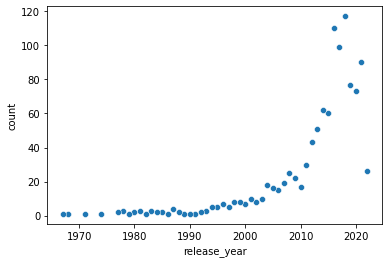

In [100]:
sns.scatterplot(x='release_year',y ='count', data=releaseYearSum)

Se puede observar que el peak de los titulos nuevos agregados en un mismo año fue el año 2017.

### Cantidad de animes por clasificacion de edad

In [101]:
titulos['age_certification'].nunique()

7

Existen 7 tipos de clasificaciones

In [102]:
titulos['age_certification'].value_counts()

TV-14    482
TV-MA    126
TV-PG    114
TV-G      13
TV-Y7     12
TV-Y       2
PG-13      1
Name: age_certification, dtype: int64

In [103]:
age_summary = pd.DataFrame(titulos,columns=['age_certification']).value_counts().reset_index().rename(columns={0:'count'})
age_summary


,age_certification,count
0,TV-14,482
1,TV-MA,126
2,TV-PG,114
3,TV-G,13
4,TV-Y7,12
5,TV-Y,2
6,PG-13,1


Grafico de barras sobre la cantidad de animes por clasificacion de edad

<AxesSubplot:xlabel='count', ylabel='age_certification'>

<Figure size 432x288 with 1 Axes>

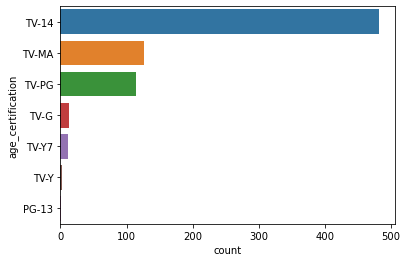

In [104]:
ax = sns.barplot(x="count", y="age_certification", data=age_summary)
ax

Se observa que casi la mitad de los titulos pertenecen a la clasificacion TV-14 (recomendado para 14 años o más)

### Promedio entre puntuacion de imdb  y puntuacion de Tmdb (The Movie database)


In [105]:
datosDistr = pd.DataFrame({'titulos':titulos['title'], 'tmdb':titulos['tmdb_score'],'imdb':titulos['imdb_score']})
datosDistr['tmdb'] = datosDistr['tmdb'].fillna(datosDistr['imdb'])
datosDistr.head()

,titulos,tmdb,imdb
0,Lupin the third,8.0,7.9
1,Mobile suit gundam,8.1,7.9
2,Galaxy express 999,8.3,7.8
3,Lupin the 3rd,8.0,8.0
4,Chōdenji machine voltes v,7.3,8.1


In [106]:
#promedio entre tmdb y imdb
datosDistr['promedio'] = (datosDistr['tmdb'] + datosDistr['imdb']) / 2

print('Promedio entre imdb y tmdb')
datosDistr.head()

Promedio entre imdb y tmdb

,titulos,tmdb,imdb,promedio
0,Lupin the third,8.0,7.9,7.95
1,Mobile suit gundam,8.1,7.9,8.00
2,Galaxy express 999,8.3,7.8,8.05
3,Lupin the 3rd,8.0,8.0,8.00
4,Chōdenji machine voltes v,7.3,8.1,7.70


Text(0.5, 1.0, 'Distribucion de Puntuacion IMDB y  puntuacion de The movie Database')

<Figure size 216x276.48 with 1 Axes>

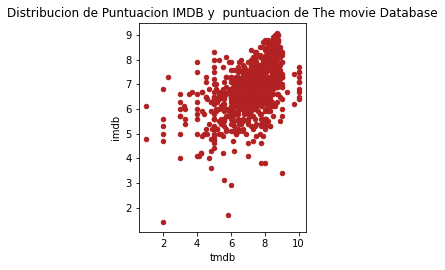

In [107]:
#Grafico con MatPlotLib
fig, ax = plt.subplots(figsize=(3, 3.84))
datosDistr.plot(x = 'tmdb',y='imdb',c='firebrick',kind='scatter',ax = ax)
ax.set_title('Distribucion de Puntuacion IMDB y  puntuacion de The movie Database')

In [108]:
titulos.sort_values(by='imdb_score', ascending = False).dropna()

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
83,Fullmetal alchemist: brotherhood,SHOW,Edward and Alphonse Elric's reckless disregard...,2009,TV-14,29,"scifi, action, animation, comedy, drama, fantasy",1.0,9.1,156503.0,110.534,8.7
243,Hunter x hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"drama, action, comedy, crime, animation, docum...",3.0,9.0,87857.0,117.924,8.8
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8
316,Attack on titan,SHOW,"Several hundred years ago, humans were nearly ...",2013,TV-MA,24,"scifi, action, drama, fantasy, horror, animation",4.0,9.0,325381.0,139.388,8.6
85,Death note,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,"scifi, animation, crime, drama, fantasy, thriller",1.0,9.0,302147.0,104.037,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Rainy cocoa,SHOW,Aoi’s soaked by a sudden rainstorm and takes s...,2015,TV-PG,2,"animation, comedy",5.0,3.6,60.0,4.467,4.8
743,Tsukipro the animation,SHOW,"SOARA, Growth, SolidS, and QUELL are four grou...",2017,TV-PG,24,"comedy, animation, music",2.0,3.4,11.0,6.920,9.0
763,Hand shakers,SHOW,"Tazuna is a high school student, living in Osa...",2017,TV-14,23,"action, scifi, animation",1.0,3.1,185.0,13.014,5.6
1060,Ex-arm,SHOW,2014: Akira Natsume seems to almost have a pho...,2021,TV-14,23,"scifi, animation, action, crime, romance",1.0,1.7,750.0,16.550,5.8


In [109]:
datosDistr['promedio'].mean()

6.995920617420066

Se puede observar que el promedio del promedio de las puntuaciones es equivalente a 7.0

Ya que el promedio puede ser convieniente a la hora de recomendar titulos , se le asignara una columna promedio al dataframe de los titulos


In [110]:
titulos['score_promedio'] = datosDistr['promedio']

In [111]:
#resultado
titulos.head(3)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0,7.95
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,7.9,2281.0,41.250,8.1,8.00
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,7.8,459.0,5.064,8.3,8.05


In [112]:
titulos.score_promedio.dtype

dtype('float64')

### Filtros para los generos

Para poder filtrar facilmente los titulos se crearon estas dos funciones 
1. multicontainsFun para poder filtrar en titulos que tengan varios generos solo si tambien contiene el buscado

2. solocontainsFun para poder filtrar en titulos que solo tengan el genero que se busca

In [113]:
#Para filtrar
def multicontainsFun(tipoStr = "" , column = 'genres'):
   return titulos[titulos[column].str.contains(tipoStr)]

def solocontainsFun(tipoStr = "", column = 'genres'):
   return titulos[titulos[column] == tipoStr]



In [114]:
multicontainsFun(tipoStr='action', column='genres').sort_values(by="tmdb_popularity" ,ascending = False)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8,8.90
432,Dragon ball super,SHOW,"With Majin Boo defeated half-a-year prior, pea...",2015,TV-14,23,"action, scifi, comedy, animation, thriller, dr...",5.0,8.4,28567.0,423.650,8.2,8.30
12,Dragon ball z,SHOW,Dragon Ball Z is a Japanese animated televisio...,1989,TV-PG,24,"scifi, action, animation, comedy, fantasy, thr...",16.0,8.8,125554.0,389.990,8.2,8.50
86,Naruto,SHOW,"In another world, ninja are the ultimate power...",2002,TV-PG,23,"scifi, comedy, animation, action, fantasy, thr...",6.0,8.4,93980.0,362.730,8.4,8.40
84,Naruto shippūden,SHOW,Naruto Shippuuden is the continuation of the o...,2007,TV-14,23,"scifi, action, animation, comedy, drama, fantasy",24.0,8.7,115863.0,350.688,8.6,8.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Akudama drive,SHOW,"Long ago, a war broke out in Japan that pitted...",2020,TV-MA,23,"animation, action, scifi",1.0,7.4,1743.0,NaN,NaN,7.40
937,Gibiate,SHOW,"A disease called ""Gibia"" has infected the worl...",2020,NaN,23,"action, fantasy, animation",1.0,4.2,172.0,NaN,NaN,4.20
989,Mushoku tensei: jobless reincarnation,SHOW,A 34-year-old Japanese NEET is run over by a s...,2021,TV-MA,23,"drama, fantasy, animation, action",1.0,8.4,8436.0,NaN,NaN,8.40
997,Rust-eater bisco,SHOW,In a world where mushrooms have decimated the ...,2022,TV-14,23,"scifi, animation, action, fantasy",1.0,7.0,581.0,NaN,NaN,7.00


### Filtro para la clasificacion de edad

In [115]:
#filtro para la clasificacion de edad
def filtroclassEdad(certif = 'TV-14'):
    return titulos[titulos['age_certification'] == certif]

#filtro para la clasificacion de edad en multiples filtros
def mdfiltroclassEdad(certif = '', data = ''):
    return data[data['age_certification'] == certif]
    

In [116]:
filtroclassEdad(certif='TV-14').head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.9,2116.0,45.829,8.0,7.95
3,Lupin the 3rd,SHOW,The master thief Lupin III and his cronies con...,1977,TV-14,24,"scifi, animation, action, comedy, crime, fantasy",4.0,8.0,1738.0,0.600,NaN,8.00
13,Dragon ball,SHOW,"Long ago in the mountains, a fighting master k...",1986,TV-14,24,"scifi, thriller, animation, action, comedy, fa...",10.0,8.6,55153.0,16.956,8.2,8.40
32,One piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"action, comedy, animation, drama, fantasy",21.0,8.8,112586.0,105.955,8.8,8.80


### Filtro para clasificar por Año de estreno

In [117]:

#Para filtro solo
def filtroYear(year = "" ,fromD = ""):
    inst = "Instruccions : \n year -> is the year (int) you want titles from  \n fromD -> options are 'before' or 'after' "
    try:
        if fromD == 'before':
             return titulos[titulos['release_year'] < int(year)].sort_values(by='release_year', ascending = False)
        elif fromD == 'after':
             return titulos[titulos['release_year'] >= int(year)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")
    
#Para filtro dentro de un filtro
def mdfiltroYear(year = "" ,fromD = "" , data= ""):
    inst = "Instruccions : \n year -> is the year (int) you want titles from  \n fromD -> options are 'before' or 'after' "
    try:
        if fromD == 'before':
             return data[data['release_year'] < int(year)].sort_values(by='release_year', ascending = False)
        elif fromD == 'after':
             return data[data['release_year'] >= int(year)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")

In [118]:
filtroYear(year= "2017" , fromD="after").head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
599,Black clover,SHOW,Asta and Yuno were abandoned together at the s...,2017,TV-14,23,"drama, fantasy, scifi, thriller, animation, ac...",4.0,8.3,19970.0,82.964,8.5,8.40
690,Clockwork planet,SHOW,"One day, a black box suddenly crashed into the...",2017,TV-14,24,"scifi, animation, fantasy",1.0,5.3,174.0,13.397,7.2,6.25
689,Juni taisen: zodiac war,SHOW,The 12th Twelve Tournament that gets held ever...,2017,TV-14,23,"action, animation, fantasy",1.0,6.6,776.0,15.877,7.9,7.25
766,Chiruran 1/2,SHOW,"Strong, intense, and cute! The most laid-back ...",2017,NaN,2,"action, comedy, history, animation",1.0,4.0,7.0,4.147,4.7,4.35


In [119]:
filtroYear(year= "2017" , fromD="before").head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
598,Kiitaro's yokai picture diary,SHOW,Kiitarou is a boy with a strong sixth sense wh...,2016,NaN,4,scifi,3.0,NaN,NaN,4.577,6.4,NaN
455,Ace attorney,SHOW,A rookie lawyer Ryuuichi Naruhodou stands up t...,2016,TV-14,24,"thriller, animation, drama, comedy, crime",2.0,6.4,380.0,15.064,7.3,6.85
508,New game!,SHOW,"After graduating high school, Suzukaze Aoba jo...",2016,TV-14,23,"comedy, animation, drama",2.0,7.2,807.0,9.298,7.2,7.20
509,Bananya,SHOW,Bananya is a series about the secret life of k...,2016,TV-G,3,"animation, comedy, family",2.0,6.2,156.0,10.088,6.5,6.35


### Filtro para la Puntuacion

In [120]:
#usando score_promedio como variable
def filtroScore(score = '' , gorl=''):
    inst = "Instruccions : \n score -> is the score (int) you want titles from  \n gorl -> options are 'greater' than or 'lower' than"
    try:
        if gorl == 'greater':
             return titulos[titulos['score_promedio'] >= float(score)].sort_values(by='release_year', ascending = False)
        elif gorl == 'lower':
             return titulos[titulos['score_promedio'] <= float(score)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")
    

def mdfiltroScore(score = '' , gorl='',data = ''):
    inst = "Instruccions : \n score -> is the score (int) you want titles from  \n gorl -> options are 'greater' than or 'lower' than"
    try:
        if gorl == 'greater':
             return data[data['score_promedio'] >= float(score)].sort_values(by='release_year', ascending = False)
        elif gorl == 'lower':
             return data[data['score_promedio'] <= float(score)].sort_values(by='release_year', ascending = True)
        else:
            return print(f"please Try Again with correct values !! \n {inst}")
    except Exception as e:
        return print(f"Error : \n {e} \n {inst}")   

In [121]:
filtroScore(score= '8.5' , gorl='greater').head(4)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.380,8.8,8.90
971,Oddtaxi,SHOW,"This town should look familiar, but suddenly, ...",2021,TV-14,23,"comedy, animation, crime, drama, thriller",1.0,8.5,3129.0,14.681,8.8,8.65
879,Cherry magic! thirty years of virginity can ma...,SHOW,Kiyoshi Adachi is a 30-year-old office worker ...,2020,NaN,23,"comedy, fantasy, romance",1.0,8.3,1381.0,10.619,8.8,8.55
816,Jujutsu kaisen,SHOW,Yuji Itadori is a boy with tremendous physical...,2020,TV-MA,24,"scifi, action, fantasy, thriller, animation",2.0,8.6,48949.0,303.199,8.5,8.55


### Probando filtros multiples

In [122]:
# Este ejemplo muestra un filtro de un filtro en este caso los titulos que contienen accion dentro del filtro titulos despues del año 2017
data = pd.DataFrame( multicontainsFun(tipoStr='action', column='genres'))
mdfiltroYear(year= "2017" , fromD="after",data=data).head(4)


,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
599,Black clover,SHOW,Asta and Yuno were abandoned together at the s...,2017,TV-14,23,"drama, fantasy, scifi, thriller, animation, ac...",4.0,8.3,19970.0,82.964,8.5,8.40
694,Magical circle guruguru,SHOW,The seal that for hundreds of years had confin...,2017,TV-14,24,"action, animation",2.0,7.2,12.0,2.803,8.0,7.60
689,Juni taisen: zodiac war,SHOW,The 12th Twelve Tournament that gets held ever...,2017,TV-14,23,"action, animation, fantasy",1.0,6.6,776.0,15.877,7.9,7.25
741,Chronos ruler,SHOW,"The story centers on ""Chronos Rulers,"" those w...",2017,TV-14,23,"action, scifi, animation",1.0,5.9,43.0,3.260,6.8,6.35


In [123]:
# Este ejemplo muestra un filtro de un filtro en este caso los titulos que contienen solo el genero de accion dentro del filtro titulos despues del año 2017
data = solocontainsFun(tipoStr='action', column='genres')
print("Este ejemplo muestra un filtro de un filtro en este caso solo los titulos que contienen \n como unico el genero de accion dentro del filtro titulos despues del año 2017")
mdfiltroYear(year= "2017" , fromD="after",data=data).head(3)

Este ejemplo muestra un filtro de un filtro en este caso solo los titulos que contienen 
 como unico el genero de accion dentro del filtro titulos despues del año 2017

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
801,Ikemen sengoku: toki wo kakeru ga koi wa hajim...,SHOW,NaN,2017,NaN,3,action,1.0,NaN,NaN,1.280,8.0,NaN
725,Bakumatsu,SHOW,"Kyoto, Japan. The heroine meets a man who give...",2018,NaN,24,action,2.0,NaN,NaN,6.656,9.2,NaN
878,Final fantasy xv: episode ardyn -prologue-,SHOW,NaN,2019,NaN,13,action,1.0,NaN,NaN,3.226,10.0,NaN


In [124]:
#Uso de filtro de la clasificacion de edad
print("Probando los mismos filtros anteriores pero tambien añadiendo el filtro de la clasificacion de edad")
data = solocontainsFun(tipoStr='action', column='genres')
data1 = mdfiltroYear(year= "2017" , fromD="after",data=data)
mdfiltroclassEdad(certif='TV-14', data=data1).head(3)

Probando los mismos filtros anteriores pero tambien añadiendo el filtro de la clasificacion 
de edad

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
840,Yashahime: princess half-demon,SHOW,The daughters of Sesshoumaru and Inuyasha set ...,2020,TV-14,24,action,2.0,NaN,NaN,68.223,7.6,NaN
978,Sk8 the infinity,SHOW,"""S"" is a dangerous, top secret, no-holds-barre...",2021,TV-14,23,action,1.0,NaN,NaN,44.095,8.9,NaN
1026,The world ends with you: the animation,SHOW,Neku awakens in the middle of Shibuya's bustli...,2021,TV-14,23,action,1.0,NaN,NaN,11.747,7.8,NaN


Se pueden llegar a los resultados queridos haciendo uso de las funciones de los filtros.

Ahora se quiere probar lo mismo pero con un genero diferente y titulos desde el año 2013 en adelante

In [125]:
#Ejemplo 2
data = solocontainsFun(tipoStr='comedy', column='genres')
data1 = mdfiltroYear(year= "2013" , fromD="after",data=data)
mdfiltroclassEdad(certif='TV-14', data=data1).head(3)

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
515,To be hero,SHOW,"Our main character, Ossan, is a no-good father...",2016,TV-14,11,comedy,2.0,6.8,55.0,7.216,4.7,5.75
837,Toilet-bound hanako-kun,SHOW,"The famous ""Seven Wonders"" that every school s...",2020,TV-14,24,comedy,1.0,7.8,6.0,87.025,8.8,8.30
1073,Dr. ramune: mysterious disease specialist,SHOW,"So long as people have hearts, there will be t...",2021,TV-14,23,comedy,1.0,NaN,NaN,12.370,5.7,NaN


### Usando Funcion para buscar un titulo

In [126]:
#Para buscar un titulo
def buscarTitulo(titulo = "Gintama"):
    funtitle = titulos['title'].str.contains(titulo)
    return titulos[funtitle]

In [127]:

buscarTitulo(titulo='Spy')

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
965,Spy x family,SHOW,Master spy Twilight is the best at what he doe...,2022,TV-14,24,"action, comedy, drama, thriller, animation",1.0,9.0,5847.0,1199.38,8.8,8.9


In [128]:
buscarTitulo(titulo='Spy').iloc[0,2]

"Master spy Twilight is the best at what he does when it comes to going undercover on dangerous missions in the name of a better world. But when he receives the ultimate impossible assignment—get married and have a kid—he may finally be in over his head!\n\nNot one to depend on others, Twilight has his work cut out for him procuring both a wife and a child for his mission to infiltrate an elite private school. What he doesn't know is that the wife he's chosen is an assassin and the child he's adopted is a telepath!"

In [129]:
buscarTitulo(titulo='Gintama')

,title,type,description,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,score_promedio
92,Gintama,SHOW,In an era where aliens have invaded and taken ...,2006,TV-14,24,"action, comedy, scifi, animation",12.0,8.7,10445.0,68.218,7.9,8.3


### Requerimientos para poder lograr el objetivo

1. Poder filtrar entre generos
2. Identificar y comparar con popularidad
3. filtrar por clasificacion de edad



### Ejemplo de un caso manual de lo que Quiero lograr :

<u>Mi perfil </u>:
tengo 22 años

<u>Caso 1 </u>:
yo vi spy x familiy  y me gusto ->  
* genero = action , comedia , drama y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.8  -> "es una puntuacion alta"
* imdb_score = 9.0  -> "es una puntuacion alta"
* tmdb_popularity = 1200
* age_certification = TV-14 -> "recomendacion para 14 años o más"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 2 </u>:
yo vi jujutsu kaisen  y me gusto ->  
* genero = scifi ,action , fantasy y thriller -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 8.5  -> "es una puntuacion alta"
* imdb_score = 8.6  -> "es una puntuacion alta"
* tmdb_popularity = 303
* age_certification = TV-MA -> "apta solo para mayores"
* seasons = 1.0 -> "Solo tiene 1 temporada"
* runtime = 24 -> "solo tendra 24 episodios (actualmente)"

<u>Caso 3 </u>:
yo vi gintama  y me gusto ->  
* genero = action ,comedy y scifi -> "Generos que me gustan porque la serie me gusta"
* tmdb_score = 7.9  -> "es el mas bajo de los tres casos pero mayor que 6.5"
* imdb_score = 8.7  -> "es una puntuacion alta"
* tmdb_popularity = 68.218
* age_certification = TV-14 -> "apta solo para mayores"
* seasons = 12.0 -> "Solo tiene 12 temporada"
* runtime = 24 -> "24 episodios por temporada "

<u>Diagrama de venn de los generos </u> :       

<img src="assets/diagramavennIA.svg" style="width:550px ;">

1. la interseccion entre los tres es la accion.
2. los generos en comun entre "Spy x Family" y "Jujutsu Kaisen" es el genero de Thriller.
3. los generos en comun entre "Spy x Family" y "Gintama" es el genero de comedia.
4. los generos en comun entre "Jujustu Kaisen" y "Gintama" es el genero del Scifi o Ciencia ficcion.
5. el complemento de "Spy x Family" es genero de drama.
6. el complemento de "Jujustu Kaisen" es genero de fantasia.




                            

### Visualizacion de los 3 casos


In [130]:
titulos.iloc[965]

title                                                     Spy x family
type                                                              SHOW
description          Master spy Twilight is the best at what he doe...
release_year                                                      2022
age_certification                                                TV-14
runtime                                                             24
genres                      action, comedy, drama, thriller, animation
seasons                                                            1.0
imdb_score                                                         9.0
imdb_votes                                                      5847.0
tmdb_popularity                                                1199.38
tmdb_score                                                         8.8
score_promedio                                                     8.9
Name: 965, dtype: object

In [131]:
titulos.iloc[816]

title                                                   Jujutsu kaisen
type                                                              SHOW
description          Yuji Itadori is a boy with tremendous physical...
release_year                                                      2020
age_certification                                                TV-MA
runtime                                                             24
genres                     scifi, action, fantasy, thriller, animation
seasons                                                            2.0
imdb_score                                                         8.6
imdb_votes                                                     48949.0
tmdb_popularity                                                303.199
tmdb_score                                                         8.5
score_promedio                                                    8.55
Name: 816, dtype: object

In [132]:
titulos.iloc[92]

title                                                          Gintama
type                                                              SHOW
description          In an era where aliens have invaded and taken ...
release_year                                                      2006
age_certification                                                TV-14
runtime                                                             24
genres                                action, comedy, scifi, animation
seasons                                                           12.0
imdb_score                                                         8.7
imdb_votes                                                     10445.0
tmdb_popularity                                                 68.218
tmdb_score                                                         7.9
score_promedio                                                     8.3
Name: 92, dtype: object

In [133]:
titulos.drop(['imdb_score','imdb_votes','tmdb_popularity','tmdb_score'],axis=1,inplace=True)

resetear index para no tener errores

In [134]:
titulos = titulos.reset_index()
titulos = titulos.set_index('index')

In [135]:
titulos.head(3)

,title,type,description,release_year,age_certification,runtime,genres,seasons,score_promedio
index,,,,,,,,,
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.95
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,8.00
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,8.05


### Aplicando Modelo de Prediccion

In [136]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

from sentence_transformers import SentenceTransformer


Num GPUs Available:  1

Utilizando bert podemos descomponer los textos en vectores

In [137]:
#este codigo arregla el problema de encontrar un float en las descripciones
mask = titulos['description'].str.len() >=1
titulos= titulos.loc[mask]
titulos['description'] = titulos['description'].astype('str')

In [138]:
titulos.head(3)

,title,type,description,release_year,age_certification,runtime,genres,seasons,score_promedio
index,,,,,,,,,
0,Lupin the third,SHOW,Arsene Lupin III is the grandson of the master...,1971,TV-14,23,"scifi, animation, action, comedy, crime",6.0,7.95
1,Mobile suit gundam,SHOW,Mobile Suit Gundam is a televised anime series...,1979,TV-Y7,25,"scifi, war, animation, action, drama, fantasy",1.0,8.00
2,Galaxy express 999,SHOW,Galaxy Express 999 is a manga written and draw...,1978,TV-PG,24,"scifi, action, drama, animation",1.0,8.05


In [139]:
titulos.iloc[0,2]

'Arsene Lupin III is the grandson of the master thief Arsene Lupin. With his cohorts Daisuke Jigen and Goemon Ishikawa XIII and his love interest Fujiko Mine, he pulls off the greatest heists of all time while always escaping the grasp of Inspector Koichi Zenigata.'

la descripcion sigue siendo la misma

### Aplicando Sentence Transformer de BERT

In [141]:
X = np.array(titulos.description)

In [142]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/huggingface_hub/file_download.py:560: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Batches:   0%|          | 0/33 [00:00<?, ?it/s]

### Pca de los datos

In [184]:
X = np.array(embeddings)
pca = PCA(n_components=5)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.051082,1.157259,-3.335542,-0.849743,2.202416
1,0.636873,8.027571,-1.808916,-1.300975,-2.239021
2,2.209832,6.677346,2.890487,-1.472307,-0.279216
3,5.512547,-0.642223,-0.864836,-0.756717,2.983536
4,0.151231,8.698125,-1.628009,-1.224903,-2.361611


In [186]:
pca_data.shape

(1050, 5)

<seaborn.axisgrid.PairGrid object at 0x15c993ac0>

<Figure size 468x468 with 30 Axes>

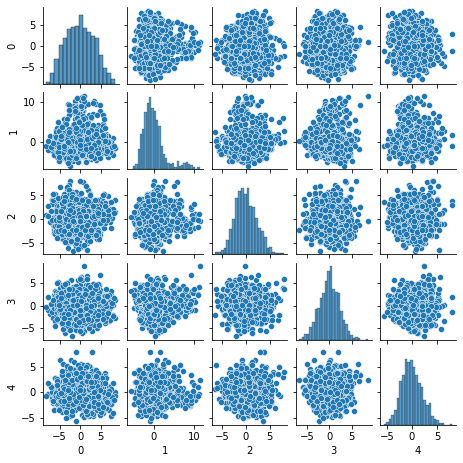

In [185]:
sns.pairplot(pca_data  ,height=1.3)

### Funcion para recomendar

In [187]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  titulos_recomm =  titulos['title'].loc[index_recomm].values
  result = {'Anime':titulos_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('El anime visto es este : %s \n'%(titulos['title'].loc[index]))
    k=1
    for anime in titulos_recomm:
      print('el numero %i del anime recomendado es este: %s \n'%(k,anime))
  if print_recommendation_plots==True:
    print('La descripcion del anime visto es este :\n %s \n'%(titulos['description'].loc[index]))
    k=1
    for q in range(len(titulos_recomm)):
      plot_q = titulos['description'].loc[index_recomm[q]]
      print('ela descripcion del anime numero %i recomendado es este :\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('Los generos del anime visto es este:\n %s \n'%(titulos['genres'].loc[index]))
    k=1
    for q in range(len(titulos_recomm)):
      plot_q = titulos['genres'].loc[index_recomm[q]]
      print('La descripcion del anime numero %i recomendado es este:\n %s \n'%(k,plot_q))
      k=k+1
  return result

### Resultados

<Figure size 1440x1440 with 4 Axes>

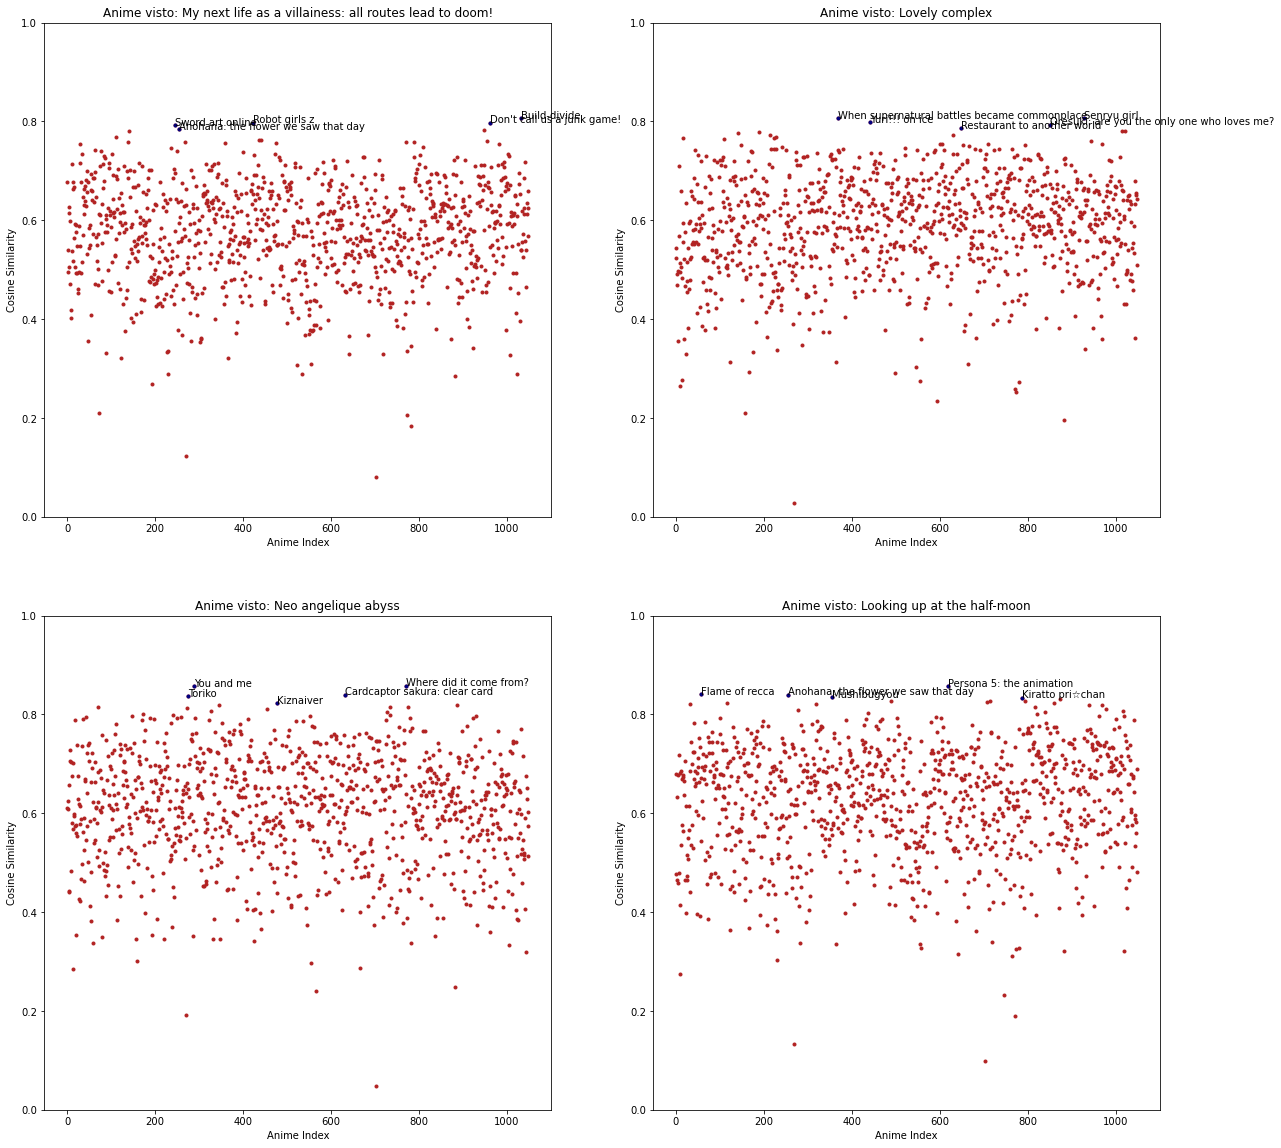

In [189]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Anime']
  plt.plot(x,y,'.',color='navy',label='Animes recomendados')
  plt.title('Anime visto: '+titulos['title'].loc[index])
  plt.xlabel('Anime Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [171]:
give_recommendations(965,True)

El anime visto es este : Spy x family

el numero 1 del anime recomendado es este: Room camp

el numero 1 del anime recomendado es este: Love stage!!

el numero 1 del anime recomendado es este: Cells at work!

el numero 1 del anime recomendado es este: Case closed

el numero 1 del anime recomendado es este: Isekai cheat magician

{
    'Anime': array(['Room camp', 'Love stage!!', 'Cells at work!', 'Case closed',
       'Isekai cheat magician'], dtype=object),
    'Index': [944, 359, 607, 41, 852]
}

In [162]:
give_recommendations(816,True)

El anime visto es este : Jujutsu kaisen

el numero 1 del anime recomendado es este: Space pirate mito

el numero 1 del anime recomendado es este: Bungo stray dogs

el numero 1 del anime recomendado es este: 22/7

el numero 1 del anime recomendado es este: Alice & zoroku

el numero 1 del anime recomendado es este: Mischief of the gods

{
    'Anime': array(['Space pirate mito', 'Bungo stray dogs', '22/7', 'Alice & zoroku',
       'Mischief of the gods'], dtype=object),
    'Index': [76, 443, 938, 767, 351]
}

In [163]:
give_recommendations(92,True)

El anime visto es este : Gintama

el numero 1 del anime recomendado es este: Six god combination godmars

el numero 1 del anime recomendado es este: The new prince of tennis

el numero 1 del anime recomendado es este: Overlord

el numero 1 del anime recomendado es este: Princess nine

el numero 1 del anime recomendado es este: Wooser's hand-to-mouth life

{
    'Anime': array(['Six god combination godmars', 'The new prince of tennis',
       'Overlord', 'Princess nine', "Wooser's hand-to-mouth life"],
      dtype=object),
    'Index': [31, 286, 440, 81, 308]
}